In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

'''Comparing hit and hit-flop datasets'''

#Get dataset an columns that will be used
hitsflops = pd.read_csv("billboard-hits-flops-raw.csv")
#Removing flops to get an even distribution of hits and flops
hitsflops.drop(hitsflops.tail(198).index, inplace=True)

usecols = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'sections',
        'target', 'weeks', 'artist_popularity', 'artist_followers', 
           'number_of_artists', 'popularity', 'release_date']

artistcols = ['weeks', 'artist_popularity', 'artist_followers', 
           'number_of_artists', 'popularity', 'target']

df = hitsflops[usecols]
df['release_year'] = pd.to_datetime(df['release_date']).dt.year
#df['release_year'] = df['release_date'].dt.year
df.drop(df[df.release_year < 2000].index, inplace=True)

artist_df = hitsflops[artistcols]

#Checking hits2
print("Number of songs in dataset: " + str(len(hitsflops.index)))
artists2 = hitsflops.artist.unique()
print("Number of unique artists in dataset: " + str(len(artists2)))

hf = hitsflops.apply(lambda x: True if x['target'] == 1 else False, axis=1)

# Count number of True in the series
print("Number of hits in dataset: ", len(hf[hf == True].index))
print("Number of flops in dataset: ", len(hf[hf == False].index))

Number of songs in dataset: 15230
Number of unique artists in dataset: 1773
Number of hits in dataset:  7615
Number of flops in dataset:  7615


/Users/eivindrebnord/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/eivindrebnord/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


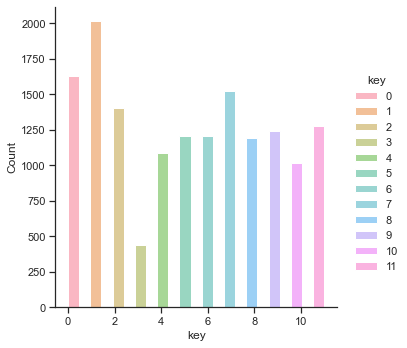

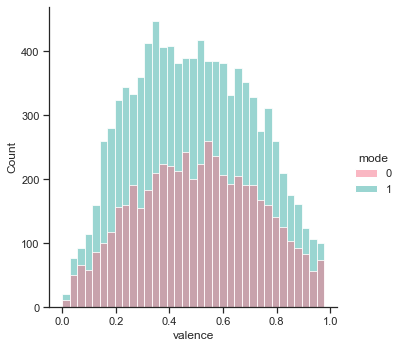

In [75]:
sns.set_theme(style="ticks")
sns.displot(x=df['key'], data=df, hue='key', palette=sns.color_palette("husl", 12))
sns.displot(x=df['valence'], data=df, hue='mode', palette=sns.color_palette("husl", 2))

#pd.plotting.scatter_matrix(df)
#sns.pairplot(df, hue='target')

In [86]:
#Printing mean values in features
for v in df:
        print("Mean of ", v, " is:", df[v].mean())
print("Mean of song popularity if it was on billboard: ", hitsflops[hitsflops['target'] == 1]['popularity'].mean())
print("Mean of song popularity if it was not on billboard: ", hitsflops[hitsflops['target'] == 0]['popularity'].mean())
print("Mean of song duration (minutes) if it was on billboard: ", df[df['target'] == 1]['duration_ms'].mean()/60000)
print("Mean of song duration (minutes) if it was not on billboard: ", df[df['target'] == 0]['duration_ms'].mean()/60000)

Mean of  danceability  is: 0.627835613919895
Mean of  energy  is: 0.6646906220617201
Mean of  key  is: 5.204661851608667
Mean of  loudness  is: -6.419941234405777
Mean of  mode  is: 0.648456992777413
Mean of  speechiness  is: 0.1269445108338805
Mean of  acousticness  is: 0.2029641313834537
Mean of  instrumentalness  is: 0.017899351579776755
Mean of  liveness  is: 0.19066291529875246
Mean of  valence  is: 0.49509279711096515
Mean of  tempo  is: 121.66019067629678
Mean of  duration_ms  is: 217185.78135259356
Mean of  time_signature  is: 3.9443204202232436
Mean of  sections  is: 9.632239001969797
Mean of  target  is: 0.5
Mean of  weeks  is: 57.40525279054498
Mean of  artist_popularity  is: 77.13788575180564
Mean of  artist_followers  is: 9350208.026066974
Mean of  number_of_artists  is: 1.3704530531845043
Mean of song popularity if it was on billboard:  58.10505581089954
Mean of song popularity if it was not on billboard:  35.60170715692712
Mean of song duration if it was on billboard:  3

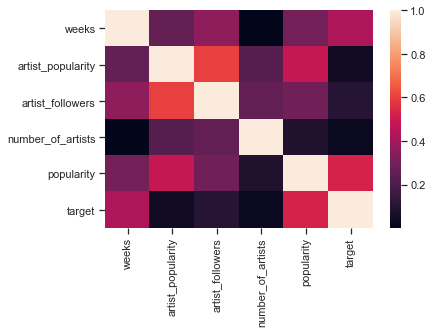

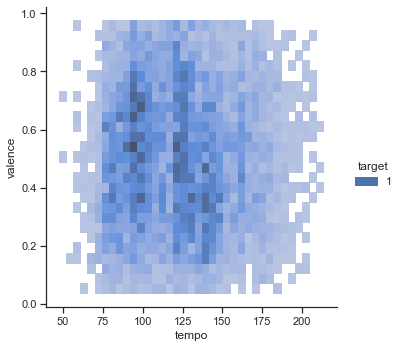

In [79]:
sns.heatmap(artist_df.corr())
sns.displot(x='tempo', y='valence', data=df[df['target'] == 1], hue='target')

<AxesSubplot:xlabel='artist_followers', ylabel='popularity'>

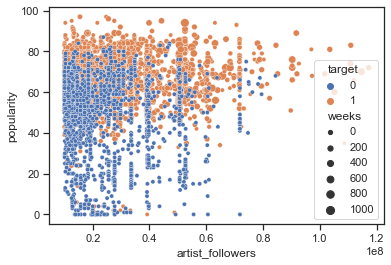

In [98]:
sns.scatterplot(x='artist_followers', y='popularity', data=df[df['artist_followers']>50000000], hue='target', size='weeks')

<AxesSubplot:xlabel='release_year', ylabel='popularity'>

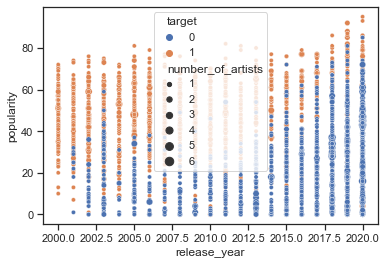

In [111]:
sns.scatterplot(x='release_year', y='popularity', data=df[df['artist_followers']<1000000], hue='target', size='number_of_artists')

<AxesSubplot:xlabel='release_year', ylabel='popularity'>

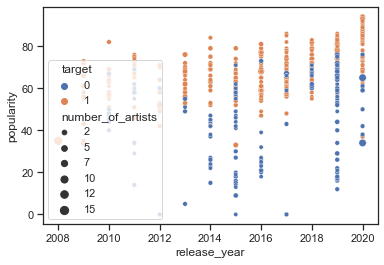

In [112]:
sns.scatterplot(x='release_year', y='popularity', data=df[df['artist_followers']>50000000], hue='target', size='number_of_artists')

In [ ]:
#Make dataset of potential breakthroughs